In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_AG_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,0.78343,0.51035,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.42850,0.14333,1.19480,2.13180,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.21000,3.99630,2.21730,3.90290,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,NaN,NaN,NaN,NaN,1.66010,2.35270,0.66126,NaN,NaN,3.734600
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.37740,1.52260,0.98475,3.10940,3.65640,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.88269,0.35406,1.62780,3.29400,1.08500,0.15740,0.46504,2.851400
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.68610,1.09510,3.79360,0.12790,0.54249,3.36580,3.755600
397,-3.479100,-1.993300,1.32480,1.77210,2.55090,1.47010,0.92540,1.84110,3.47730,0.95496,1.52630,2.123800
398,7.293000,-0.411470,2.49480,0.39655,2.99900,3.41010,2.95160,0.27800,0.99059,3.43740,1.81620,0.087212


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	39
float64		column 2	92
float64		column 3	131
float64		column 4	26
float64		column 5	104
float64		column 6	91
float64		column 7	39
float64		column 8	66
float64		column 9	79
float64		column 10	52
float64		column 11	92
float64		column 12	131


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,361.000000,308.000000,269.000000,374.000000,296.000000,309.000000,361.000000,334.000000,321.000000,348.000000,308.000000,269.000000
mean,-0.092800,-0.020976,2.008757,1.892021,1.948811,1.978339,2.033848,1.980350,1.976181,2.054601,1.992248,1.970582
std,2.581257,2.713798,1.133315,1.148496,1.160453,1.130841,1.150357,1.152708,1.144553,1.152731,1.182274,1.196697
min,-7.771000,-6.800500,0.010405,0.005376,0.043571,0.018503,0.003618,0.007321,0.007019,0.067105,0.006786,0.001972
25%,-0.705950,-0.828385,1.110200,0.925565,0.917987,1.111200,1.022500,1.016850,1.010000,1.039925,0.914077,0.926110
50%,-0.082221,0.009048,2.084100,1.770600,1.947800,2.020800,2.102400,1.966950,2.093300,2.114850,1.984200,1.939900
75%,0.785490,0.821035,2.954900,2.822825,2.964400,2.958100,2.968500,3.038500,2.925800,3.053600,3.084025,3.008900
max,8.409300,6.777100,3.951500,3.993400,3.979000,3.992300,3.996300,3.995000,3.985500,3.984300,3.967600,3.981000


<AxesSubplot:>

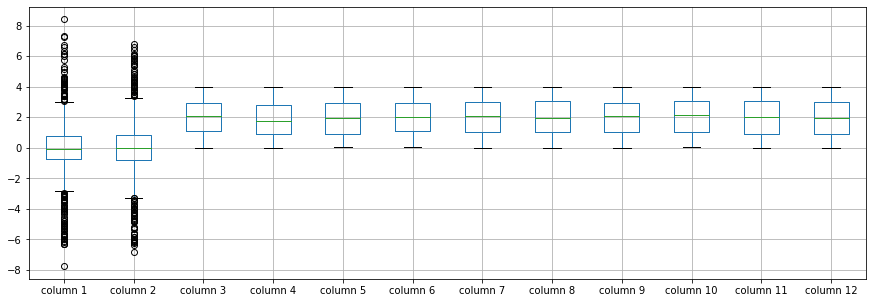

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    -0.092800
column 2    -0.020976
column 3     2.008757
column 4     1.892021
column 5     1.948811
column 6     1.978339
column 7     2.033848
column 8     1.980350
column 9     1.976181
column 10    2.054601
column 11    1.992248
column 12    1.970582
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,0.043613,0.004940,-0.067461,0.022334,0.011218,-0.006514,0.057650,-0.049047,0.023347,0.053685,0.046754
column 2,0.043613,1.000000,-0.012786,0.072092,-0.091300,-0.056394,0.070469,-0.037810,0.005383,0.009189,0.008223,0.113015
column 3,0.004940,-0.012786,1.000000,0.084394,-0.093548,-0.082565,-0.145508,0.140538,0.113613,-0.048189,-0.092249,-0.038544
column 4,-0.067461,0.072092,0.084394,1.000000,-0.017718,0.063240,-0.011599,0.069797,-0.028505,0.065131,-0.010959,-0.079392
column 5,0.022334,-0.091300,-0.093548,-0.017718,1.000000,0.101746,0.040616,0.051777,0.064777,0.012327,-0.018341,-0.071349
column 6,0.011218,-0.056394,-0.082565,0.063240,0.101746,1.000000,-0.021484,0.044481,0.019859,0.027103,-0.006557,-0.051788
column 7,-0.006514,0.070469,-0.145508,-0.011599,0.040616,-0.021484,1.000000,-0.011098,0.094927,-0.013759,0.053405,-0.026118
column 8,0.057650,-0.037810,0.140538,0.069797,0.051777,0.044481,-0.011098,1.000000,0.058640,-0.167879,-0.017813,-0.057917
column 9,-0.049047,0.005383,0.113613,-0.028505,0.064777,0.019859,0.094927,0.058640,1.000000,0.006165,0.055661,0.017266
column 10,0.023347,0.009189,-0.048189,0.065131,0.012327,0.027103,-0.013759,-0.167879,0.006165,1.000000,0.010435,-0.080170


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+10,12+10+10,12+10+10+10,12+10+10+10+10,12+10+10+10+10+10,12+10+10+10+10+10+10,12+10+10+10+10+10,12+10+10+10+10,12+10+10+10,12+10+10,12+10,12], vae_layer = False, seed = 10)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 22.38725296020508
Epoch: 1 , loss: 22.40268768310547
Epoch: 2 , loss: 22.347981185913085
Epoch: 3 , loss: 22.333889389038085
Epoch: 4 , loss: 22.317048645019533
Epoch: 5 , loss: 22.248326721191408
Epoch: 6 , loss: 22.252367553710936
Epoch: 7 , loss: 22.21037239074707
Epoch: 8 , loss: 22.148371124267577
Epoch: 9 , loss: 22.1335090637207
Epoch: 10 , loss: 22.088131942749023
Epoch: 11 , loss: 22.00529266357422
Epoch: 12 , loss: 21.900404663085936
Epoch: 13 , loss: 21.683854217529298
Epoch: 14 , loss: 21.092699432373045
Epoch: 15 , loss: 19.789565200805665
Epoch: 16 , loss: 17.75987190246582
Epoch: 17 , loss: 16.680879173278807
Epoch: 18 , loss: 16.62534942626953
Epoch: 19 , loss: 16.24791976928711
Epoch: 20 , loss: 16.360931663513185
Epoch: 21 , loss: 16.22777976989746
Epoch: 22 , loss: 16.3239497756958
Epoch: 23 , loss: 16.198185539245607
Epoch: 24 , loss: 16.05835121154785
Epoch: 25 , loss: 16.164859275

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.70595
column 2     0.12893
column 3     1.05810
column 4     2.13620
column 5     2.14860
column 6     2.24580
column 7     3.72770
column 8     2.22720
column 9     1.94350
column 10    1.98700
column 11    2.47070
column 12    0.36826
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0
1,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0
2,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0
3,0.0,0.0,-0.177633,-0.141116,-0.004905,-0.37491,0.0,0.0,0.0,-2.937731,-3.745431,0.0
4,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0
396,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0
397,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0
398,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(68.86955187901692, 163.27447192538312)

In [17]:
NRMS=numerator/denominator
NRMS


0.4218023250474238

In [18]:
new_df.iloc[66,:]

column 1     0.82272
column 2     0.26776
column 3     0.40343
column 4     1.18720
column 5     3.95660
column 6     2.58300
column 7     2.83060
column 8     3.07420
column 9     1.53810
column 10    0.24620
column 11    0.85334
column 12    3.60440
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.978900,1.836300,2.886600,2.46960,0.21541,3.09000,0.78343,0.510350,0.030430,0.100660
1,0.029389,0.206580,0.488610,1.434300,3.129900,1.27780,1.42850,0.14333,1.19480,2.131800,0.984730,3.844500
2,-1.115400,0.217560,1.610500,1.337100,3.768200,1.21000,3.99630,2.21730,3.90290,1.514400,2.438900,0.633580
3,-0.539160,-0.061874,0.187227,0.191664,0.185365,0.19225,1.66010,2.35270,0.66126,0.197369,0.192669,3.734600
4,-0.268400,-1.006000,2.882200,1.561600,3.201400,3.37740,1.52260,0.98475,3.10940,3.656400,3.917200,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.725800,3.704800,0.882690,0.35406,1.62780,3.29400,1.08500,0.157400,0.465040,2.851400
396,0.264630,-6.107600,3.905400,1.337700,1.418700,1.68610,1.09510,3.79360,0.12790,0.542490,3.365800,3.755600
397,-3.479100,-1.993300,1.324800,1.772100,2.550900,1.47010,0.92540,1.84110,3.47730,0.954960,1.526300,2.123800
398,7.293000,-0.411470,2.494800,0.396550,2.999000,3.41010,2.95160,0.27800,0.99059,3.437400,1.816200,0.087212


In [20]:
imputations[-1].to_excel("Difdoug_AG_20(imp).xlsx", index=False, header=False)